**Tugas Klasifikasi CNN Kecerdasan Buatan**

Datasets: Jenis Bunga

| Daisy, Dandelion, Rose, Sunflower, Tulip |

https://www.kaggle.com/datasets/alxmamaev/flowers-recognition/data

1. Zaki Marsyandi
2. Fachri Auliya Hibban Prasetyo
3. Ahmad Rasyid
4. Ahmad Hisyam Murtadho



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import random
import shutil
from google.colab import files

import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [ ]:
zip_path = ('/content/drive/My Drive/flowers.zip')
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/flowers')

In [ ]:
original_dir = '/content/flowers/flowers'
base_dir = '/content/images'

In [ ]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

os.makedirs(base_dir, exist_ok=True)

for cls in classes:
    src = os.path.join(original_dir, cls)
    dst = os.path.join(base_dir, cls)
    os.makedirs(dst, exist_ok=True)
    for img_file in os.listdir(src):
        full_src_path = os.path.join(src, img_file)
        full_dst_path = os.path.join(dst, img_file)
        shutil.copy(full_src_path, full_dst_path)

In [ ]:
train_dir = '/content/images/train'
val_dir = '/content/images/val'

In [ ]:
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    cls_path = os.path.join(base_dir, cls)
    images = os.listdir(cls_path)
    random.shuffle(images)

    split_point = int(len(images) * 0.8)
    train_images = images[:split_point]
    val_images = images[split_point:]

    # Pindahkan ke folder train
    for img in train_images:
        src = os.path.join(cls_path, img)
        dst = os.path.join(train_dir, cls, img)
        shutil.move(src, dst)

    # Pindahkan ke folder val
    for img in val_images:
        src = os.path.join(cls_path, img)
        dst = os.path.join(val_dir, cls, img)
        shutil.move(src, dst)

    # Hapus folder kelas utama setelah dipindah
    shutil.rmtree(cls_path)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,039,173 (72.63 MB)

 Trainable params: 19,037,701 (72.62 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model_bunga.keras',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    ),
    tf.keras.callbacks.EarlyStopping(
        patience=5,
        monitor='val_accuracy',
        mode='max',
        restore_best_weights=True,
        verbose=1
    )
]

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=val_generator,
    validation_steps=20,
    callbacks=callbacks
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.4109 - loss: 2.8565 - val_accuracy: 0.3328 - val_loss: 3.2131
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.4980 - loss: 1.2656 - val_accuracy: 0.3297 - val_loss: 4.3781
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 793ms/step - accuracy: 0.5487 - loss: 1.1862 - val_accuracy: 0.3297 - val_loss: 4.0029
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.6224 - loss: 0.9983 - val_accuracy: 0.3297 - val_loss: 4.3095
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.5825 - loss: 1.0687 - val_accuracy: 0.3469 - val_loss: 2.7480
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 884ms/step - accuracy: 0.6142 - loss: 0.9242 - val_accuracy: 0.3453 - val_loss: 2.9873
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.6350 - loss: 0.9578 - val_accuracy: 0.3703 - val_loss: 2.6855
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.6337 - loss: 1.0137 - val_accuracy: 0.5047

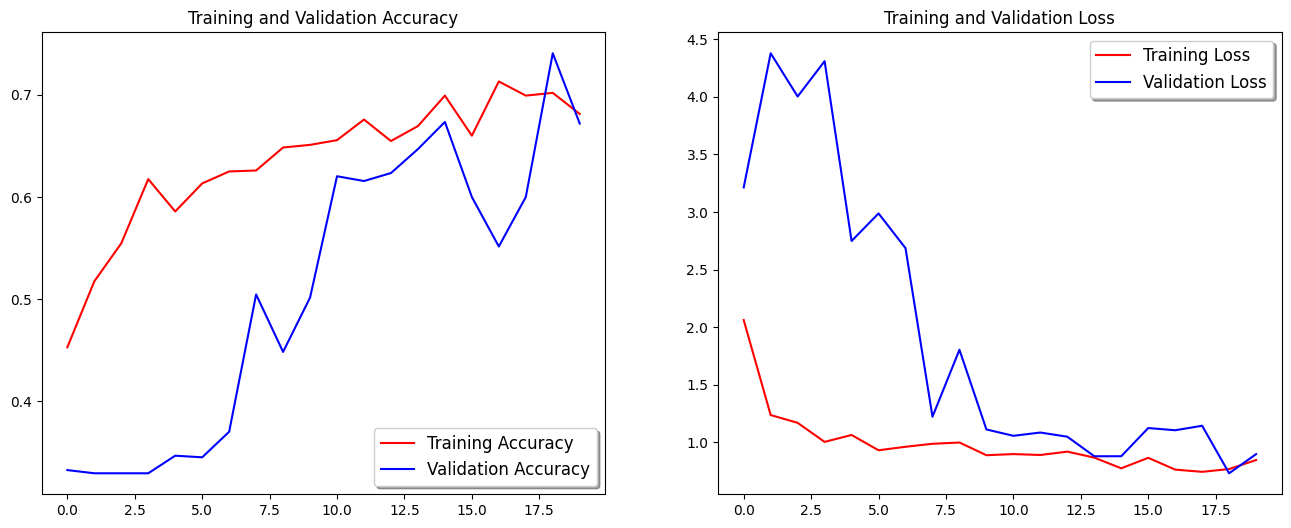

In [ ]:
# Plot akurasi dan loss dari pelatihan dan validasi
plt.figure(figsize=(16, 6))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b', label='Validation Accuracy')
plt.legend(loc='lower right',fontsize='large',shadow=True)
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'],'b', label='Validation Loss')
plt.legend(loc='upper right',fontsize='large',shadow=True)
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
print(train_generator.class_indices)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


Saving rose.jpg to rose.jpg
Saving sunflower.jpg to sunflower.jpg
Saving tulips.jpg to tulips.jpg
Saving 63rssntqn0cldet.jpeg to 63rssntqn0cldet.jpeg
Saving daisy.jpg to daisy.jpg


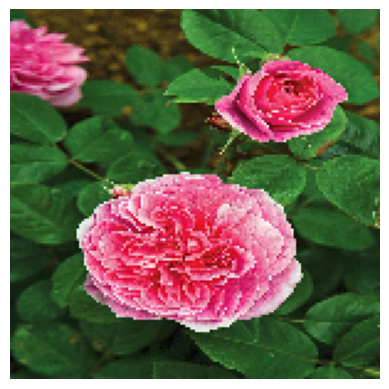

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
rose.jpg → Predicted Class: Rose


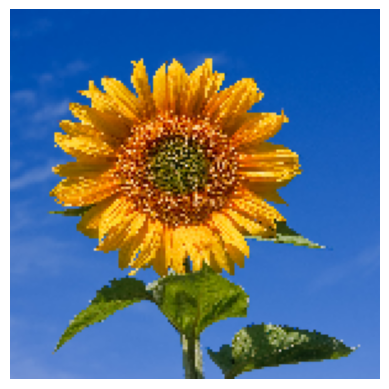

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
sunflower.jpg → Predicted Class: Dandelion


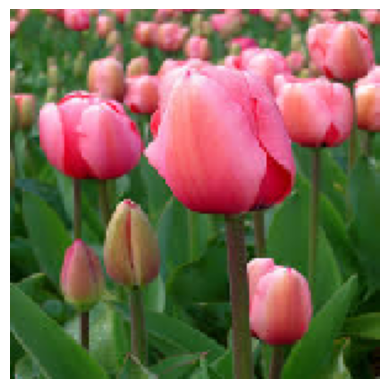

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
tulips.jpg → Predicted Class: Tulip


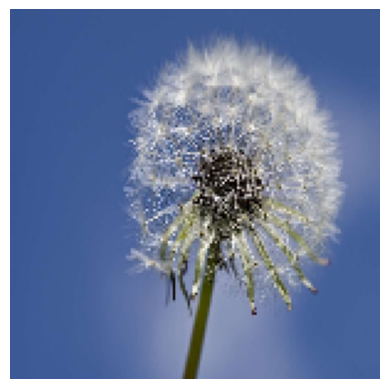

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
63rssntqn0cldet.jpeg → Predicted Class: Dandelion


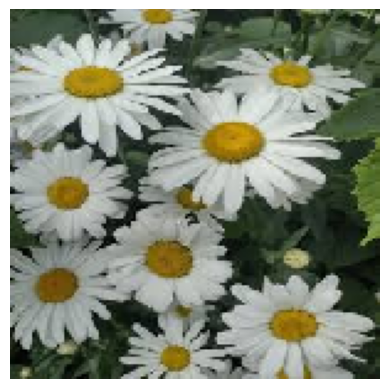

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
daisy.jpg → Predicted Class: Daisy


In [ ]:
uploaded = files.upload()

class_indices = train_generator.class_indices
labels = dict((v, k) for k, v in class_indices.items())

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    pred = model.predict(x)
    predicted_index = np.argmax(pred[0])
    predicted_label = labels[predicted_index]

    print(f"{fn} → Predicted Class: {predicted_label.capitalize()}")